In [103]:
import random
from scipy.spatial import Delaunay, ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio

In [ ]:
def in_hull(p,hull):
    #https://stackoverflow.com/questions/16750618/whats-an-efficient-way-to-find-if-a-point-lies-in-the-convex-hull-of-a-point-cl/16898636#16898636
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)
    
    return hull.find_simplex(p)>=0

In [ ]:
cells  = np.random.rand(10,3)
bm_cells = np.random.rand(10,3)
hull = Delaunay(cells)
result = in_hull(bm_cells, hull)
printtitle=(result.tolist())
print()

In [122]:
pos=[-1.6461105902410171,0.23579802536615535,1.8412400844944363,-1.9537815990775318,-0.05732927820620137,-1.4291219455027075,0.7652569959620257,-1.051994813886088,-1.5291889451883183,0.7799384291742903,1.4779927855463288,-0.5345684442289791,-1.7525362094344121,-1.3638812584540307,-0.36259940482873265,1.3838499542085065,-0.79212016010616,1.5383966153669562,-1.7239446337279238,-0.418025441993251,-0.38036280204316686,1.615377706383324,-0.36140435202697674,-1.348286987226052,0.14057667836322185,-0.2674924153900795,0.03753199758895942,-0.4212281345090254,0.2772244169983873,1.840848967020384]
posBM=[1.3694022766913685,1.403592331981943,-0.09457753736752661,1.9067405631257985,1.9406438333648346,1.5647298010153001,-0.1770536367000224,-1.4345558081017984,-0.06514880295917092,-0.2434846833916975,0.5297329835818045,-0.1696227251244702,0.5611559491089633,0.09350830161787282,-0.3672793350164216,-1.7512068021491363,0.08500453342507175,0.9345511234988066,-0.2867153945186587,-0.49302437309224434,-1.2099396561654405,0.7821075567261868,1.0711625159627918,0.5862203276603317,-0.5153668222478931,-1.0761403412073118,-1.4611313849404821,0.7013688507896143,-1.6254856772049235,0.9669976194597325]
#Int32[-1,,-1,,-1,,12,,2,,-1,,1,,-1,,-1,,-1]
#Bool[0,,0,,0,,1,,1,0,,1,,0,,0,,0]
cells = np.array(pos).reshape(10,3)
bm_cells = np.array(posBM).reshape(10,3)
hull = Delaunay(cells)
result = in_hull(bm_cells, hull)
printtitle=(result.tolist())
print(printtitle)

[False, False, False, True, True, False, True, False, False, False]


In [118]:
#2d plotting procedure

# plt.plot(cells[:,0], cells[:,1], 'bo')
# plt.plot(bm_cells[:,0], bm_cells[:,1], 'ro')

# hull2 = ConvexHull(cells)  
# for simplex in hull2.simplices:
#     plt.plot(cells[simplex, 0], cells[simplex, 1], 'b-')
    
# n = [0,1,2,3,4,5,6,7,8,9]

# for i, txt in enumerate(n):
#     plt.annotate(txt, (cells[i,0], cells[i,1]), size=16, color = 'b')
#     plt.annotate(txt, (bm_cells[i,0], bm_cells[i,1]), size = 16, color = 'r')
# plt.title(title)   
# plt.savefig("ConvexHull_2")

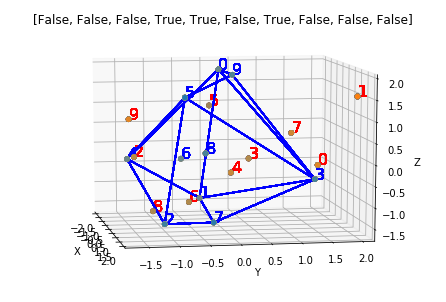

In [121]:
xcells=cells[:,0]
ycells=cells[:,1]
zcells = cells[:,2]
xbm=bm_cells[:,0]
ybm=bm_cells[:,1]
zbm = bm_cells[:,2]

hull2 = ConvexHull(cells)  
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(printtitle)
for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    ax.scatter(xcells, ycells, zcells, 'r')
    ax.scatter(xbm,ybm,zbm, 'b')

    for simplex in hull2.simplices:
        plt.plot(cells[simplex, 0], cells[simplex, 1], cells[simplex,2], 'b-')
        #plt.fill(cells[hull.vertices,0], cells[hull.vertices,1], cells[hull.vertices,2], 'k', alpha=0.3)

    for i in range(10): #plot each point + it's index as text above
        ax.text(cells[i,0],cells[i,1],cells[i,2],  '%s' % (str(i)), size=16, zorder=1, color='b') 
        ax.text(bm_cells[i,0],bm_cells[i,1],bm_cells[i,2],  '%s' % (str(i)), size=16, zorder=1, color='r')  

    #ax.set_title("{}, view = {}".format(printtitle,ii), pad=10)
    plt.savefig("{}".format(ii))


In [111]:
filenames= ["{}.png".format(10*i) for i in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('output3.gif', images, fps=5)